In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.3 MB/s 

In [1]:
pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [2]:
pip install python-multipart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
pip install uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00


In [4]:
import pandas as pd

# New Section

In [5]:
from pycaret.datasets import get_data
jewel_data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [8]:
jewel_data.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [6]:
# check the shape of the data
jewel_data.shape

(505, 4)

In [7]:
data = jewel_data.sample(frac=0.95, random_state=42).reset_index(drop=True)
data_unseen = jewel_data.drop(data.index).reset_index(drop=True)

print("Data for Modelling: "+ str(data.shape))
print("Unseen Data For Predictions: "+ str(data_unseen.shape))

Data for Modelling: (480, 4)
Unseen Data For Predictions: (25, 4)


SETTING UP ENVIRONMENT IN PYCARET

In [10]:
from pycaret.clustering import *

In [12]:
cust_exp = setup(data = jewel_data)

,Description,Value
0,Session id,2073
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


CREATING A MODEL

In [22]:
kmeans = create_model('kmeans', 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [23]:
print(kmeans)

KMeans(n_clusters=3, random_state=2073)


ASSIGN A MODEL


In [24]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 0
1,59,81799,0.791082,5417.661621,Cluster 0
2,62,74751,0.702657,9258.993164,Cluster 0
3,59,74373,0.765680,7346.334473,Cluster 0
4,87,17760,0.348778,16869.507812,Cluster 2


In [25]:
kmean_results[kmean_results['Cluster'] == 3]

,Age,Income,SpendingScore,Savings,Cluster


PLOT A MODEL

In [26]:
plot_model(kmeans)

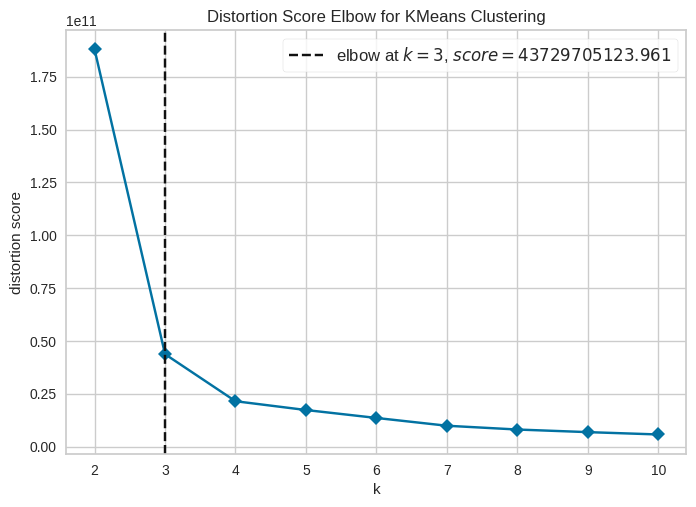

In [27]:
plot_model(kmeans, plot = 'elbow')

In [28]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

PREDICT UNSEEN DATA

In [29]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,65.0,71229.0,0.787890,9024.337461,Cluster 0
1,86.0,23400.0,0.278036,15215.281264,Cluster 2
2,32.0,108417.0,0.287371,16696.398659,Cluster 1
3,84.0,24105.0,0.271809,16524.902538,Cluster 2
4,84.0,30481.0,0.397023,16837.205965,Cluster 2


SAVING THE MODEL

In [30]:
save_model(kmeans, 'Final Kmeans Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=3, random_state=2073))]),
 'Final Kmeans Model.pkl')

LOADING SAVED MODEL

In [31]:
saved_kmeans = load_model('Final Kmeans Model')

Transformation Pipeline and Model Successfully Loaded


In [32]:
new_prediction = predict_model(saved_kmeans, data= data_unseen)

In [33]:
new_prediction.head()

,Age,Income,SpendingScore,Savings,Cluster
0,65,71229,0.787890,9024.337891,Cluster 0
1,86,23400,0.278036,15215.281250,Cluster 2
2,32,108417,0.287371,16696.398438,Cluster 1
3,84,24105,0.271809,16524.902344,Cluster 2
4,84,30481,0.397023,16837.205078,Cluster 2
